In [ ]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade- Successfully installed

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib- Successfully installed

In [ ]:
# do I need to use the MinMax Scalar?
# is this the correct use of Multiple_Linear_Regression?
# how can I get the r2 score to improve? what should the r2 score be?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
disp = df['koi_disposition'].to_list()
disp_map = {'CONFIRMED': 0, 'FALSE POSITIVE': 1, 'CANDIDATE': 2}
df['disp_num'] = [disp_map[d] for d in df['koi_disposition']]
matrix = df.corr()
matrix['disp_num'].sort_values(ascending=False)

disp_num             1.000000
koi_steff_err1       0.173227
koi_duration_err1    0.156587
koi_time0bk_err1     0.147719
koi_period           0.124647
koi_period_err1      0.099048
koi_steff            0.071048
koi_time0bk          0.070445
koi_srad_err1        0.069335
koi_slogg_err1       0.068356
ra                   0.063848
koi_impact_err1      0.058572
koi_srad             0.035999
koi_duration         0.029554
koi_teq              0.021275
koi_insol_err1       0.014604
koi_fpflag_ss        0.013503
koi_insol            0.012070
koi_impact           0.010607
koi_depth            0.008694
koi_fpflag_co        0.008531
koi_fpflag_ec        0.008041
koi_kepmag           0.004264
koi_prad_err1        0.003135
koi_depth_err1       0.001797
koi_prad             0.001485
koi_fpflag_nt        0.000416
koi_prad_err2       -0.000998
koi_depth_err2      -0.001797
koi_impact_err2     -0.013980
koi_insol_err2      -0.014159
koi_model_snr       -0.016351
koi_srad_err2       -0.036944
dec       

# Select your features (columns)

In [11]:
# Set features. This will also be used as your x values.
# Generate a linear dataset with 3 features
X = df[['koi_period', 'koi_steff', 'koi_srad']]
y = df['disp_num']

# from sklearn.datasets import make_regression

# n_features = 3
# X, y = make_regression(n_samples=30, n_features=n_features, 
#                        n_informative=n_features, random_state=42, 
#                        noise=0.5, bias=100.0)
# print(X.shape)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.head()

,koi_period,koi_steff,koi_srad
4814,585.641180,5779,0.901
1160,7.794302,5494,0.982
6483,10.815891,6269,1.508
4354,3.003180,6606,1.768
2720,1.854474,5341,0.743


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [13]:
# Scale your data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.021996868040556117


# Train the Model



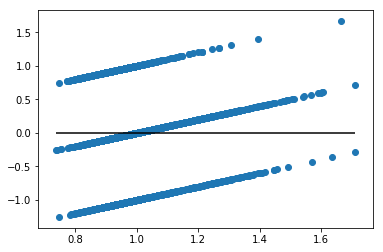

In [15]:
# print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")
# model1: sgd_clf = SGDClassifier(random_state=42)

# Plot Residuals
predictions = model.predict(X)
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [24]:
 sgd_clf = SGDClassifier(random_state=42)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [25]:
# Create the GridSearchCV model
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
              'epsilon': [0.01, 0.1, 0.05, 1]}
grid = GridSearchCV(sgd_clf, param_grid, verbose=3)

In [26]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarni

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] alpha=1e-05, epsilon=0.01 .......................................
[CV]  alpha=1e-05, epsilon=0.01, score=0.4997141223556318, total=   0.0s
[CV] alpha=1e-05, epsilon=0.01 .......................................
[CV]  alpha=1e-05, epsilon=0.01, score=0.5011441647597255, total=   0.0s
[CV] alpha=1e-05, epsilon=0.01 .......................................
[CV]  alpha=1e-05, epsilon=0.01, score=0.3665521191294387, total=   0.0s
[CV] alpha=1e-05, epsilon=0.1 ........................................
[CV]  alpha=1e-05, epsilon=0.1, score=0.4997141223556318, total=   0.0s
[CV] alpha=1e-05, epsilon=0.1 ........................................
[CV]  alpha=1e-05, epsilon=0.1, score=0.5011441647597255, total=   0.0s
[CV] alpha=1e-05, epsilon=0.1 ........................................
[CV]  alpha=1e-05, epsilon=0.1, score=0.3665521191294387, total=   0.0s
[CV] alpha=1e-05, epsilon=0.05 .......................................
[CV]  a

C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in 


[CV] alpha=0.0001, epsilon=0.1 .......................................
[CV]  alpha=0.0001, epsilon=0.1, score=0.4985706117781589, total=   0.0s
[CV] alpha=0.0001, epsilon=0.1 .......................................
[CV]  alpha=0.0001, epsilon=0.1, score=0.5131578947368421, total=   0.0s
[CV] alpha=0.0001, epsilon=0.1 .......................................
[CV]  alpha=0.0001, epsilon=0.1, score=0.5040091638029782, total=   0.0s
[CV] alpha=0.0001, epsilon=0.05 ......................................
[CV]  alpha=0.0001, epsilon=0.05, score=0.4985706117781589, total=   0.0s
[CV] alpha=0.0001, epsilon=0.05 ......................................
[CV]  alpha=0.0001, epsilon=0.05, score=0.5131578947368421, total=   0.0s
[CV] alpha=0.0001, epsilon=0.05 ......................................
[CV]  alpha=0.0001, epsilon=0.05, score=0.5040091638029782, total=   0.0s
[CV] alpha=0.0001, epsilon=1 .........................................
[CV]  alpha=0.0001, epsilon=1, score=0.4985706117781589, tota

C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in 

[CV]  alpha=0.001, epsilon=0.05, score=0.5125858123569794, total=   0.0s
[CV] alpha=0.001, epsilon=0.05 .......................................
[CV]  alpha=0.001, epsilon=0.05, score=0.5034364261168385, total=   0.0s
[CV] alpha=0.001, epsilon=1 ..........................................
[CV] . alpha=0.001, epsilon=1, score=0.4997141223556318, total=   0.0s
[CV] alpha=0.001, epsilon=1 ..........................................
[CV] . alpha=0.001, epsilon=1, score=0.5125858123569794, total=   0.0s
[CV] alpha=0.001, epsilon=1 ..........................................
[CV] . alpha=0.001, epsilon=1, score=0.5034364261168385, total=   0.0s
[CV] alpha=0.01, epsilon=0.01 ........................................
[CV]  alpha=0.01, epsilon=0.01, score=0.5008576329331046, total=   0.0s
[CV] alpha=0.01, epsilon=0.01 ........................................
[CV]  alpha=0.01, epsilon=0.01, score=0.5011441647597255, total=   0.0s
[CV] alpha=0.01, epsilon=0.01 ........................................


C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in 

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1], 'epsilon': [0.01, 0.1, 0.05, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [27]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.0001, 'epsilon': 0.01}
0.5052450886896814


In [33]:
#lkup
rf_param_grid = {
    'n_estimators' : [3, 10 , 30], 
    'max_features' : [0,'n_estimators']
}

In [29]:
#lkup
rf_clf = RandomForestClassifier()
rf_grid = GridSearchCV(rf_clf, rf_param_grid, verbose=3)
rf_grid.fit(X_train_scaled, y_train)

C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=0.516295025728988, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=0.4965675057208238, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=0.5240549828178694, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=0.5483133218982276, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=0.5394736842105263, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=0.5481099656357389, total=   0.0s
[CV] max_features=2, n_estimators=30 ......

C:\Users\motie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: max_features must be in (0, n_features]

In [34]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Save the Model

In [35]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'MonicaO_Mult_Linear_Regr.sav'
joblib.dump(rf_clf, filename)

['MonicaO_Mult_Linear_Regr.sav']